In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

In [3]:
X

array([[ 1.47504421,  0.9243214 ],
       [-0.02204385, -0.80495334],
       [-1.17671587, -1.80823709],
       [ 0.77223375,  1.00873958],
       [ 1.23283122,  0.23187816],
       [-0.92174673, -0.88390948],
       [ 1.65956844, -1.44120941],
       [ 0.33389417, -1.98431234],
       [-1.27143074, -0.79197498],
       [ 1.33614738,  1.20373092],
       [ 1.47123406, -1.13379737],
       [ 0.94839057,  1.20529925],
       [ 0.65271607,  0.92518273],
       [-0.11980203, -0.79925047],
       [ 1.26163833,  0.91422683],
       [ 0.87899009, -0.24086941],
       [ 0.74124048, -1.48941493],
       [ 0.71534397, -0.86504782],
       [ 0.80238551, -1.57971026],
       [ 0.51444771, -0.8425914 ],
       [ 1.38051886,  1.06083751],
       [ 0.42626567,  0.78108998],
       [ 0.74517391,  0.78096285],
       [ 0.78242322,  1.92463186],
       [ 0.76657723, -1.70845306],
       [ 0.82604393,  1.07817448],
       [ 1.1854125 , -0.9289691 ],
       [-1.15450648, -1.8380019 ],
       [ 1.4002824 ,

In [4]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


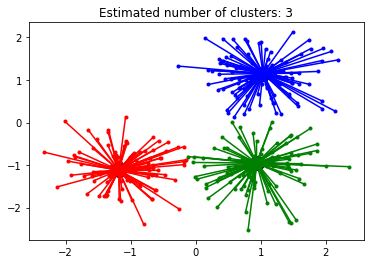

In [7]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(figsize=(20,9))
plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()